In [1]:
#https://medium.com/@rockyxu399/three-models-for-kaggles-flowers-recognition-dataset-bc2ff732cf4e
#This is a flow classification test
import os
import numpy as np
import cv2
import keras
from resnet_builder import resnet # 這是從 resnet_builder.py 中直接 import 撰寫好的 resnet 函數
from keras.models import Model, Sequential
from keras.applications.resnet50 import ResNet50
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.applications.resnet50 import ResNet50
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd

Using TensorFlow backend.


In [2]:
#Loda image
path_daisy = 'C:/Users/AlbertHsu/Documents/GitHub/4th-ML100Days/homework/Data/flowers/daisy/'
path_dandelion = 'C:/Users/AlbertHsu/Documents/GitHub/4th-ML100Days/homework/Data/flowers/dandelion/'
path_rose = 'C:/Users/AlbertHsu/Documents/GitHub/4th-ML100Days/homework/Data/flowers/rose/'
path_sunflower = 'C:/Users/AlbertHsu/Documents/GitHub/4th-ML100Days/homework/Data/flowers/sunflower/'
path_tulip = 'C:/Users/AlbertHsu/Documents/GitHub/4th-ML100Days/homework/Data/flowers/tulip/'

daisy = os.listdir(path_daisy)
dandelion = os.listdir(path_dandelion)
rose = os.listdir(path_rose)
sunflower = os.listdir(path_sunflower)
tulip = os.listdir(path_tulip)

In [3]:
#crate Lable array y 
y_daisy = [0]*len(daisy)
y_dandelion = [1]*len(dandelion)
y_rose = [2]*len(rose)
y_sunflower = [3]*len(sunflower)
y_tulip = [4]*len(tulip)

In [4]:
#Load image to arrays
img_flowers = []
img_dandelion = np.zeros((len(dandelion),1))
img_rose = np.zeros((len(rose),1))
img_sunflower = np.zeros((len(sunflower),1))
img_tulip = np.zeros((len(tulip),1))
Downsize = 128

i = 0
for i in range(len(daisy)):
    pic = cv2.imread(path_daisy+daisy[i])
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    pic = cv2.resize(pic,(Downsize,Downsize))
    img_flowers.append(pic)
    
i = 0
for i in range(len(dandelion)):
    pic = cv2.imread(path_dandelion+dandelion[i])
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    pic = cv2.resize(pic,(Downsize,Downsize))
    img_flowers.append(pic)
    
i = 0
for i in range(len(rose)):
    pic = cv2.imread(path_rose+rose[i])
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    pic = cv2.resize(pic,(Downsize,Downsize))
    img_flowers.append(pic)
    
i = 0
for i in range(len(sunflower)):
    pic = cv2.imread(path_sunflower+sunflower[i])
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    pic = cv2.resize(pic,(Downsize,Downsize))
    img_flowers.append(pic)
    
i = 0
for i in range(len(tulip)):
    pic = cv2.imread(path_tulip+tulip[i])
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    pic = cv2.resize(pic,(Downsize,Downsize))
    img_flowers.append(pic)
    
print(len(img_flowers))

4323


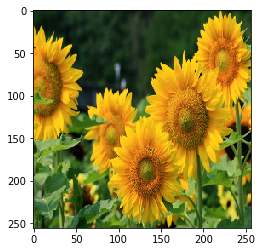

In [5]:
import matplotlib.pyplot as imgplt
imgplt.imshow(img_flowers[2605])

In [5]:
# Combine Data(img_flowers) and Label(y___)

Y = y_daisy+y_dandelion+y_rose+y_sunflower+y_tulip
Y = np.array(Y)
Y = np.reshape(Y,(Y.shape[0],1))

dataAndLabel = []
for i in range(Y.shape[0]):
    dataAndLabel.append([img_flowers[i],Y[i,0]])
    
dataAndLabel = np.array(dataAndLabel)

##打亂資料排列
np.random.seed(110)
np.random.shuffle(dataAndLabel)

4


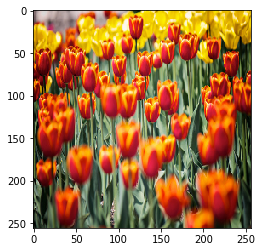

In [7]:

plt.imshow(dataAndLabel[0][0])
print(dataAndLabel[0][1])
plt.show()

In [6]:
# Reorganize data and label to X(data) Y(Label). Then Split to X_test X_train, Y_test Y_train
# And normalization
X_data = []
Y_data = []
for i in range(Y.shape[0]):
    X_data.append(dataAndLabel[i][0])
    Y_data.append(dataAndLabel[i][1])

X_data = np.array(X_data)
Y_data = np.array(Y_data)
Y_data = np.reshape(Y_data,(Y_data.shape[0],1))
Y_data = to_categorical(Y_data)

#normalization
X_data =  X_data/255 

x_train,x_test,y_train,y_test = train_test_split(X_data,Y_data,test_size=0.20,random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(3458, 128, 128, 3)
(3458, 5)
(865, 128, 128, 3)
(865, 5)


In [7]:
print(y_test)
print(x_train)

[[0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]
[[[[0.54509804 0.25490196 0.00784314]
   [0.77647059 0.7372549  0.01176471]
   [0.14509804 0.14509804 0.01176471]
   ...
   [0.98039216 0.96470588 0.38431373]
   [0.98823529 0.99607843 0.36470588]
   [0.99215686 0.99215686 0.47058824]]

  [[0.01960784 0.00784314 0.02352941]
   [0.02352941 0.00784314 0.01176471]
   [0.00392157 0.00392157 0.01176471]
   ...
   [0.98431373 0.99607843 0.49411765]
   [0.98823529 0.99215686 0.34901961]
   [0.99215686 0.98823529 0.4745098 ]]

  [[0.01960784 0.03529412 0.03529412]
   [0.0627451  0.08627451 0.10196078]
   [0.01176471 0.01960784 0.02745098]
   ...
   [0.98823529 0.99607843 0.45882353]
   [0.99215686 0.99607843 0.36078431]
   [1.         0.99215686 0.42745098]]

  ...

  [[0.05490196 0.14117647 0.10196078]
   [0.02352941 0.11764706 0.06666667]
   [0.10196078 0.19607843 0.14509804]
   ...
   [0.19215686 0.29803922 0.22352941]
   [0.156

In [7]:
# 設定循環類別參數
batch_size = 32 # batch 的大小，如果出現 OOM error，請降低這個值
num_classes = 5 # 類別的數量，共有 5 個類別
epochs = 30 # 訓練整個資料集共 30個循環
IMAGE_SIZE0 = Downsize
IMAGE_SIZE1 = Downsize

In [9]:
# Case1:建立神經網路 這邊直接用ResNet50. 如果要接續訓練，用

resnetModel = ResNet50(include_top=False, weights='imagenet', input_tensor=None,
               input_shape=(IMAGE_SIZE0,IMAGE_SIZE1,3))
x = resnetModel.output
x = Flatten()(x)

# 增加 Dense layer，以 softmax 產生個類別的機率值
output_layer = Dense(num_classes, activation='softmax', name='softmax')(x)

resnetModel50 = Model(inputs=resnetModel.input, outputs=output_layer)

resnetModel50.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [8]:
# Test: another way to build 
resnetModel50 = Sequential()
resnetModel50.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
resnetModel50.add(Flatten())
resnetModel50.add(BatchNormalization())
resnetModel50.add(Dense(2048, activation='relu'))
resnetModel50.add(BatchNormalization())
resnetModel50.add(Dense(1024, activation='relu'))
resnetModel50.add(BatchNormalization())
resnetModel50.add(Dense(len(categories), activation='softmax'))

resnetModel50.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

NameError: name 'resnet_weights_path' is not defined

In [16]:
# Case2: load我之前存好的model繼續訓練 不要跟Case1同時跑
resnetModel50 = keras.models.load_model("./FinalP_Flower_aug_1.h5")

In [13]:
# 載入 Callbacks
from keras.callbacks import ModelCheckpoint

model_ckpt = ModelCheckpoint(filepath="./FinalP_Flower_aug_1.h5", 
                             monitor="val_loss", 
                             save_best_only=True)

In [14]:
# Train Model using image augment generator
augment_generator = ImageDataGenerator(rotation_range=40, width_shift_range=0.4, height_shift_range=0.4, shear_range=0.2,
    zoom_range=0.3,horizontal_flip=True)

history = resnetModel50.fit_generator(augment_generator.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=int(len(x_train)/batch_size), # 一個 epochs 要執行幾次 update，通常是資料量除以 batch size
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test),
                    callbacks=[model_ckpt])

#score = model.evaluate(x_test, y_test, verbose=0)
score = resnetModel50.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/30
 17/108 [===>..........................] - ETA: 15:13 - loss: 1.5826 - accuracy: 0.4572

KeyboardInterrupt: 

In [22]:
# keep on trainning? 
# go back to case 2 : load model and keep on fit_generator trainning


#score = model.evaluate(x_test, y_test, verbose=0)
score = resnetModel50.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6438971869518302
Test accuracy: 0.7826589345932007


In [25]:
history = resnetModel50.fit_generator(augment_generator.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=int(len(x_train)/batch_size), # 一個 epochs 要執行幾次 update，通常是資料量除以 batch size
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test),
                    callbacks=[model_ckpt])

Epoch 1/30
108/108 [==============================] - 1063s 10s/step - loss: 0.4132 - accuracy: 0.8625 - val_loss: 1.3377 - val_accuracy: 0.7249
Epoch 2/30
108/108 [==============================] - 1051s 10s/step - loss: 0.4671 - accuracy: 0.8491 - val_loss: 0.6537 - val_accuracy: 0.7931
Epoch 3/30
108/108 [==============================] - 1046s 10s/step - loss: 0.8977 - accuracy: 0.7548 - val_loss: 3.8832 - val_accuracy: 0.2751
Epoch 4/30
108/108 [==============================] - 1146s 11s/step - loss: 0.8178 - accuracy: 0.7227 - val_loss: 0.5927 - val_accuracy: 0.7942
Epoch 5/30
108/108 [==============================] - 1078s 10s/step - loss: 0.8771 - accuracy: 0.6932 - val_loss: 4.3894 - val_accuracy: 0.4150
Epoch 6/30
108/108 [==============================] - 1052s 10s/step - loss: 0.9593 - accuracy: 0.6719 - val_loss: 1.0541 - val_accuracy: 0.6775
Epoch 7/30
108/108 [==============================] - 1052s 10s/step - loss: 0.7921 - accuracy: 0.7116 - val_loss: 0.6652 - val_ac

In [34]:
# Predict section
pred = resnetModel50.predict(x_test)

AttributeError: 'Model' object has no attribute 'predict_classes'

In [47]:
y_pred = (pred == pred.max(axis=1)[:,None]).astype(int)
print(y_pred)

[[0 0 0 0 1]
 [0 0 1 0 0]
 [0 0 0 0 1]
 ...
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]


In [48]:
from sklearn.metrics import scorer
scorer.accuracy_score(y_test, y_pred)

0.7653179190751445

In [49]:
import pandas as pd
subcsv = pd.DataFrame({'id': daisy})

In [51]:
daisynoname=os.path.splitext(daisy)[0]
print(daisy)
print(daisynoname)

TypeError: expected str, bytes or os.PathLike object, not list